In [9]:
import torch as t
import numpy as np
from matplotlib import pyplot as plt

In [48]:
# 线性回归
# y = 2 * x + 1
# 生成数据，带噪音
X = np.random.rand(100)*10
Y = 2 * X + 1 + np.random.randn(100)

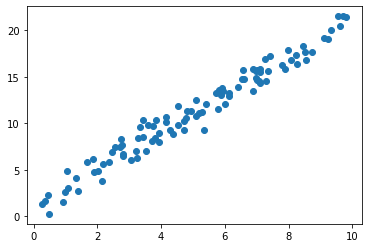

In [49]:
plt.scatter(X,Y)

In [45]:
# 随机初始化参数
w = t.rand(1,1,requires_grad=True)
b = t.rand(1,1,requires_grad=True)

In [71]:
def model_LR(X,Y,w,b,lr,iters):
    x = t.Tensor(X).reshape([-1,1])
    y = t.Tensor(Y).reshape([-1,1])
    losses = np.zeros(iters)
    for i in range(iters):
        # forward：计算loss
        y_pred = x.mm(w) + b.expand_as(y)
        loss = 0.5 * (y_pred - y) ** 2
        loss = loss.mean()
        losses[i] = loss.item()

        # backward：手动计算梯度
        loss.backward()

        # 更新参数
        w.data.sub_(lr * w.grad.data)
        b.data.sub_(lr * b.grad.data)

        # 梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    return w,b
   
model_LR(X,Y,w,b,0.01,10000)
    

(tensor([[1.9899]], requires_grad=True),
 tensor([[1.2232]], requires_grad=True))